In [1]:
library(ggplot2)
library(ggpubr)
library(cowplot)
library(tidyr)
library(dplyr)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
column_names = c("chrom", "start", "end", "RBP", "span", "index")
color = c("#2278B5", "#F57F20", "#2FA148", "#D62A28")

#### mRNA

In [4]:
df1 = read.csv("../analysis/index/translation/G1_kethoxal-HepG2-HT_M13_B01.txt", sep="\t")
colnames(df1) = column_names
df1$condition = "HT"

df2 = read.csv("../analysis/index/translation/G1_kethoxal-HepG2_M13_B01.txt", sep="\t")
colnames(df2) = column_names
df2$condition = "vivo"

df = rbind(df1, df2)
df$condition = factor(df$condition, levels=c("vivo", "HT"))

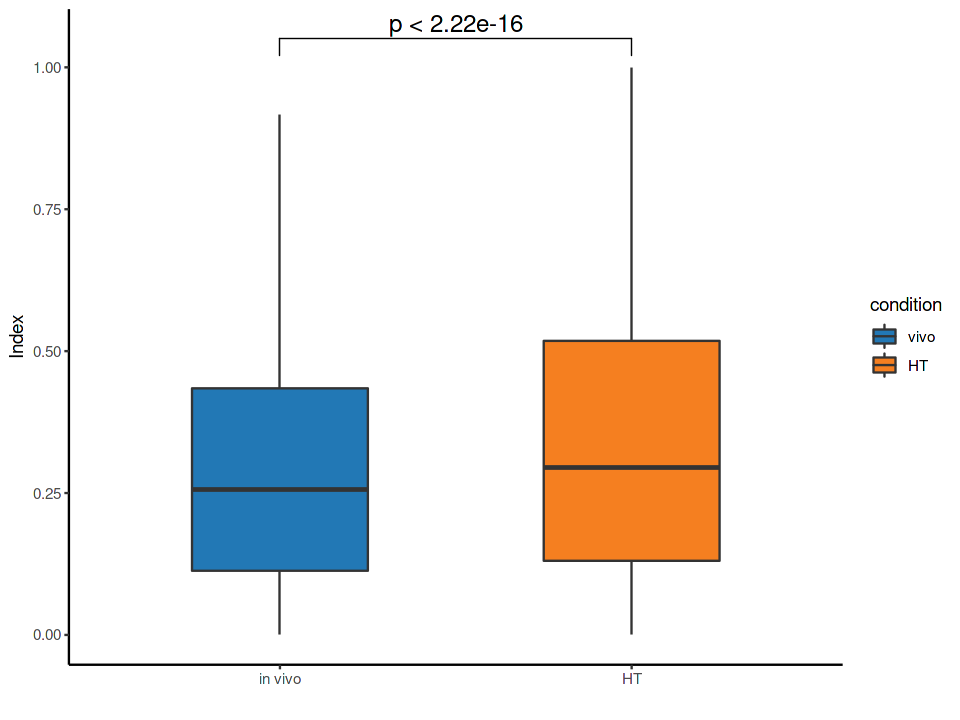

In [5]:
options(repr.plot.height=6, repr.plot.width=8)
p = ggplot(df, mapping=aes(x=condition, y=index)) + 
        geom_boxplot(mapping=aes(fill=condition), outlier.shape = NA, width=0.5) + 
        stat_compare_means(comparisons=list(c(2,1)), 
                           method.args = list(alternative = "greater"), size=5) + # 2.5
        scale_x_discrete(labels=c("in vivo", "HT")) +
        scale_fill_manual(values=color) +
        ylab("Index") + xlab("") +
        theme_classic() 
p

#### lncRNA

In [7]:
df1 = read.csv("../analysis/index/translation_lincRNA/G1_kethoxal-HepG2-HT_M13_B01.txt", sep="\t")
colnames(df1) = column_names
df1$condition = "HT"

df2 = read.csv("../analysis/index/translation_lincRNA/G1_kethoxal-HepG2_M13_B01.txt", sep="\t")
colnames(df2) = column_names
df2$condition = "vivo"

df = rbind(df1, df2)
df$condition = factor(df$condition, levels=c("vivo", "HT"))

In [8]:
df_remove = df[(df$chrom!="NR_144567")&(df$chrom!="NR_144568")&(df$chrom!="NR_131012")&(df$chrom!="NR_028272"),]

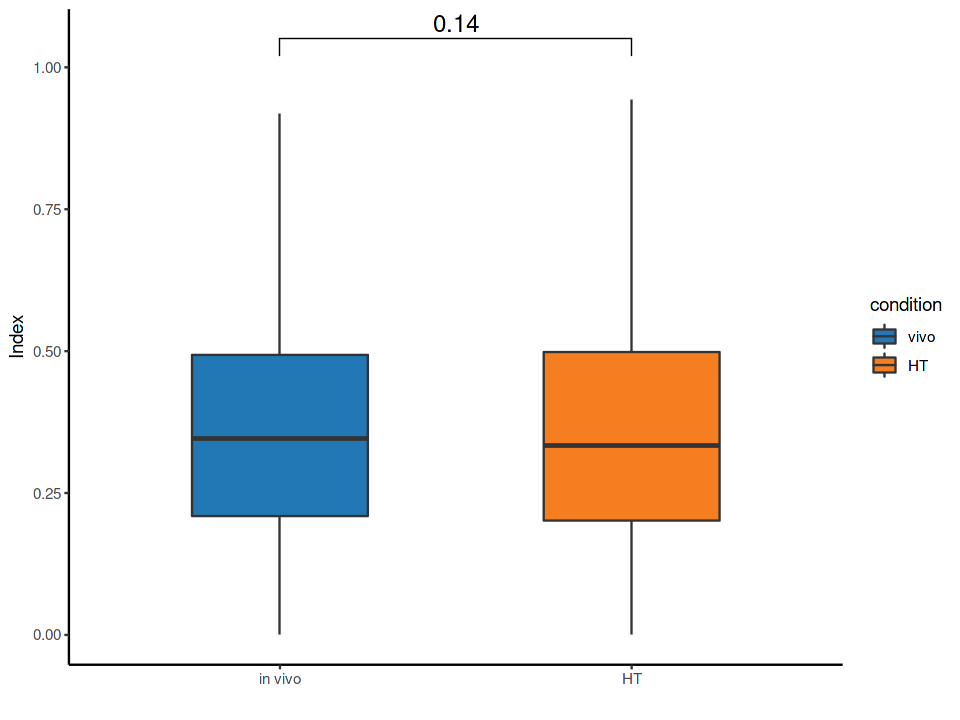

In [10]:
options(repr.plot.height=6, repr.plot.width=8)
p = ggplot(df_remove, mapping=aes(x=condition, y=index)) + 
        geom_boxplot(mapping=aes(fill=condition), outlier.shape = NA, width=0.5) + 
        stat_compare_means(comparisons=list(c(2,1)), 
                           size=5) + # 2.5
        scale_x_discrete(labels=c("in vivo", "HT")) +
        scale_fill_manual(values=color) +
        ylab("Index") + xlab("") +
        theme_classic()
p